In [1]:
import math
import matplotlib.pyplot as plt


class Fluido:
    def __init__(self, densidade, viscosidade) -> None:
        self.densidade = densidade
        self.viscosidade = viscosidade


class Elutriador:
    def __init__(self, vazao, diametro, fluido, solido, massa_retida) -> None:
        self.vazao = vazao
        self.diametro = diametro
        self.area = (math.pi*diametro**2)/4
        self.velocidade = vazao/self.area
        self.gravidade = 980
        self.massa_retida = massa_retida

        # Outros componentes
        self.fluido = fluido
        self.solido = solido
    def Cd_div_Reynolds(self):
        cd_div_reynolds = (4*(self.solido.densidade - self.fluido.densidade)*self.fluido.viscosidade*self.gravidade)/(3*self.fluido.densidade**(2)*self.velocidade**3)
        return cd_div_reynolds
    def Reynolds(self):
        t1 = (24*(self.Cd_div_Reynolds())**(-1))**(0.88/2)
        t2 = (0.43*(self.Cd_div_Reynolds())**(-1))**(0.88)
        reynolds = (t1 + t2)**(1/0.88)
        return reynolds
    def Diametro_particula(self):
        diametro_particula_coletada = self.fluido.viscosidade*self.Reynolds()/(self.velocidade*self.fluido.densidade)
        return diametro_particula_coletada
    
class Solido:
    def __init__(self, densidade, massa, diametro_min=0, diametro_max=0) -> None:
        self.densidade = densidade
        self.massa = massa
        self.diametro_min = diametro_min
        self.diametro_max = diametro_max

class Sistema_de_Elutriadores:
    def __init__(self, massa_saida,*elutriadores) -> None:
        self.massa_saida = massa_saida
        self.sistema = list(elutriadores)
        
    def Massa_total(self):
        massa_total = self.massa_saida
        for i in self.sistema:
            massa_total += i.massa_retida
        return massa_total
    
    def Fração_massica_retida(self):
        massa_total = self.Massa_total()
        fracao_massica = []
        for i in self.sistema:
            fracao_massica.append(i.massa_retida/massa_total)
        fracao_massica.append(self.massa_saida/massa_total)
        return fracao_massica
    
    def Diametros_coletados_min(self):
        diametros = []
        for i in self.sistema:
            diametros.append(i.Diametro_particula())
        diametros.append(0)
        return diametros

In [2]:
solido = Solido(2650, None, diametro_max=55e-6)
fluido = Fluido(997, 0.890e-3)
elutriador1 = Elutriador(0.001, 55e-6, fluido, solido, 1)
elutriador2 = Elutriador(0.001, 40e-6, fluido, solido, 1)
elutriador3 = Elutriador(0.001, 25e-6, fluido, solido, 1)
elutriador4 = Elutriador(0.001, 10e-6, fluido, solido, 1)


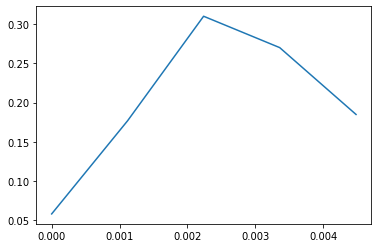

In [1]:
solido = Solido(1.8, 25, diametro_max=0.01)
fluido = Fluido(1, 0.01)
elutriador1 = Elutriador(37/60, 3, fluido, solido, 4.62)
elutriador2 = Elutriador(37/60, 4, fluido, solido, 6.75)
elutriador3 = Elutriador(37/60, 6, fluido, solido, 7.75)
elutriador4 = Elutriador(37/60, 12, fluido, solido, 4.42)

sistema = Sistema_de_Elutriadores(1.45, elutriador1, elutriador2, elutriador3, elutriador4)

fracao_massica = sistema.Fração_massica_retida()
diametros = sistema.Diametros_coletados_min()

plt.plot(diametros, fracao_massica)

In [8]:
import math
import pandas as pd

class Reynolds_de_particulas:
    
    def __init__(self, pf, u, ps, esfericidade, concentracao, g, vazao ,dp=None, vt=None) -> None:
        self.pf = pf
        self.u = u
        self.ps = ps
        self.dp = dp
        self.esfericidade = esfericidade
        self.concentracao = concentracao
        self.g = g
        self.vt = vt
        self.vazao = vazao
        pass


    def Cd_reynolds_quadrado(self):
        numerador = 4*self.pf*(self.ps-self.pf)*self.g*self.dp**3
        denominador = 3*self.u**2
        self.cd_reynolds_quadrado = numerador/denominador
        return numerador/denominador

    def Reynolds_calculator(self):
        from math import log10
        self.k1 = 0.843*log10(self.esfericidade/0.065)
        self.k2 = 5.31 - 4.88*self.esfericidade
        if self.vt == None:
            a = self.Cd_reynolds_quadrado()
            if self.esfericidade == 1:
                self.reynolds = ((a/24)**-0.95 + (a/0.43)**(-0.95/2))**(-1/0.95)
                return self.reynolds
            elif self.esfericidade != 1:
                n = 1.2
                self.reynolds = ((self.k1*a/24)**-n + (a/self.k2)**(-0.5*n))**(-1/n)
                return self.reynolds

    def terminal_velocite(self):
        self.reynolds = self.Reynolds_calculator()
        self.v_terminal = self.reynolds*self.u/(self.dp*self.pf)
        return self.v_terminal
    
    def diameters_and_area_of_elutriator(self):
        self.area = self.vazao/self.terminal_velocite()
        self.diameter = math.sqrt(4*self.area/math.pi)
        return self.area, self.diameter*100
    
    def print_all(self):
        lixo = self.diameters_and_area_of_elutriator()
        lista = [self.cd_reynolds_quadrado, self.k1, self.k2, self.reynolds, self.dp, self.v_terminal,self.area, self.diameter]
        return lista

elemento = "agua"
d = 999.8395
u = 1.0020*10**(-3)
nome = f"{elemento}_d={d}_u={u}_T=25°C"
elutriador1 = Reynolds_de_particulas(d, u, 2200, 0.8, 1, 9.81, 1*10**-3, dp=55*10**-6)
elutriador2 = Reynolds_de_particulas(d, u, 2200, 0.8, 1, 9.81, 1*10**-3, dp=40*10**-6)
elutriador3 = Reynolds_de_particulas(d, u, 2200, 0.8, 1, 9.81, 1*10**-3, dp=25*10**-6)
elutriador4 = Reynolds_de_particulas(d, u, 2200, 0.8, 1, 9.81, 1*10**-3, dp=10*10**-6)

lista = [elutriador1, elutriador2, elutriador3, elutriador4]
respostas = []
for i in lista:
    respostas.append(i.print_all())

respostas = pd.DataFrame(respostas, columns= ["CdRe²", "k1", "k2", "Re", "Diâmetro max (m)", "Velocidade terminal (m/s)", "Área elutriador (m²)", "Diâmetro elutriador (m)", ])
respostas

respostas.to_excel(f"{nome}.xlsx")
